In [1]:
#importing libraries
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import scipy
import json
from tqdm import tqdm
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch



C:\Users\dipta\AppData\Local\Temp\ipykernel_724\3089548664.py:9: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter
c:\Users\dipta\Documents\PythonTasks\Crowd Detection\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

from torchvision import datasets, transforms
transform=transforms.Compose([
                      transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]),
                  ])

#defining the location of dataset
root = 'C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech'
part_A_train = os.path.join(root,'part_A/train_data','images')
part_A_test = os.path.join(root,'part_A/test_data','images')
part_B_train = os.path.join(root,'part_B/train_data','images')
part_B_test = os.path.join(root,'part_B/test_data','images')
path_sets = [part_A_test]
#defining the image path
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        print(img_path)
        img_paths.append(img_path)
print(len(img_paths))
model = CSRNet()
#defining the model
model = model.cuda()
#loading the trained weights
checkpoint = torch.load('123model_best.pth.tar')
model.load_state_dict(checkpoint['state_dict'])

C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_1.jpg
C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_10.jpg
C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_100.jpg
C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_101.jpg
C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_102.jpg
C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_103.jpg
C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_104.jpg
C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_105.jpg
C:/

c:\Users\dipta\Documents\PythonTasks\Crowd Detection\env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\dipta\Documents\PythonTasks\Crowd Detection\env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [3]:
mae = 0
for i in tqdm(range(len(img_paths))):
    img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground-truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
print (mae/len(img_paths))

100%|██████████| 182/182 [02:03<00:00,  1.47it/s]

72.56859087682032


tensor([[[[0.0142, 0.0139, 0.0186,  ..., 0.0154, 0.0157, 0.0232],
          [0.0152, 0.0069, 0.0096,  ..., 0.0466, 0.0520, 0.0466],
          [0.0145, 0.0158, 0.0131,  ..., 0.0915, 0.0729, 0.0483],
          ...,
          [0.0347, 0.0394, 0.0837,  ..., 0.0061, 0.0129, 0.0142],
          [0.0306, 0.0279, 0.0341,  ..., 0.0220, 0.0157, 0.0067],
          [0.0459, 0.0292, 0.0242,  ..., 0.0207, 0.0229, 0.0165]]]],
       device='cuda:0', grad_fn=<ConvolutionBackward0>)
Predicted Count :  402


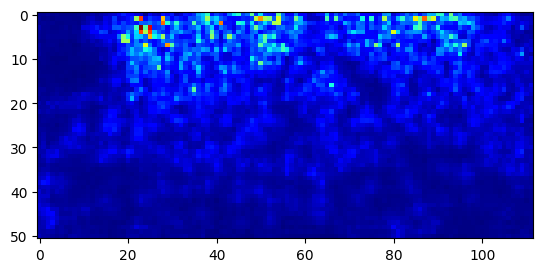

Original Count :  382


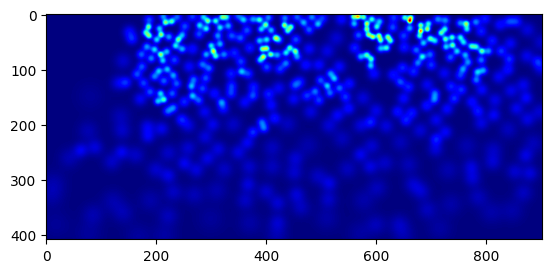

Original Image


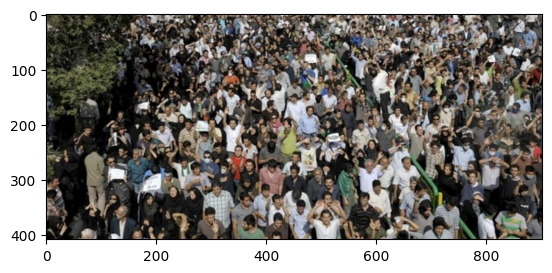

In [6]:
from matplotlib import cm as c
img = transform(Image.open('C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_100.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print(output)
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\ground-truth\IMG_100.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_100.jpg'))
plt.show()

In [8]:
import pickle

# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))

Predicted Count :  189


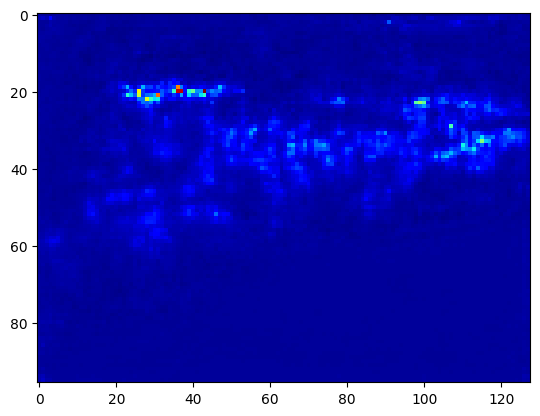

Original Image


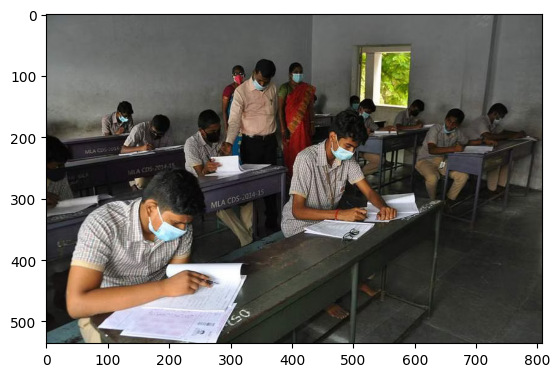

In [38]:
pickled_model = pickle.load(open('finalized_model.pkl', 'rb'))

# img = transform(Image.open('C://Users/dipta/Downloads/istockphoto-171156111-612x612.jpg').convert('RGB')).cuda()

img = transform(Image.open('C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_114.jpg').convert('RGB')).cuda()

output = pickled_model(img.unsqueeze(0))
# print(output)
# print(output.detach().cpu())
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
# temp = h5py.File('C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech/part_A/test_data/ground-truth/IMG_115.h5', 'r')
# temp_1 = np.asarray(temp['density'])
# plt.imshow(temp_1,cmap = c.jet)
# print("Original Count : ",int(np.sum(temp_1)) + 1)
# plt.show()
print("Original Image")
plt.imshow(plt.imread('C://Users/dipta/Downloads/nk_5_exam_0502chn_122_8.jpg'))
plt.show()

In [39]:
ps, ns = [], []
for i in range(len(temp)):
    if(np.average(temp[i]) < 0):
        ns.append(temp[i])
    else:
        ps.append(temp[i])

In [41]:
ps, ns = [], []
for i in range(len(temp)):
    for j in range(len(temp[i])):
        if temp[i][j] > 0:
            ps.append(temp[i][j])
        else:
            ns.append(temp[i][j])

In [42]:
print(len(ps))
print(len(ns))

9705
2583


Predicted Count :  9


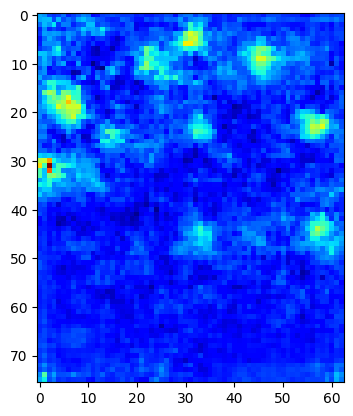

Original Image


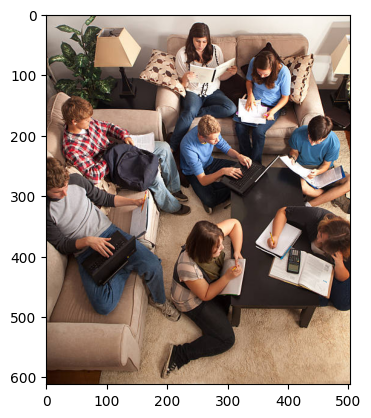

2663
2125
Ratio 1.2531764705882353
Predicted Count :  12


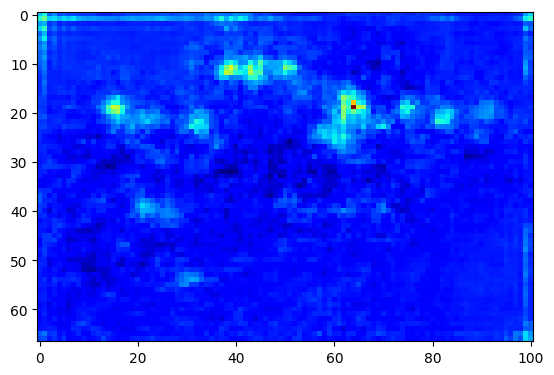

Original Image


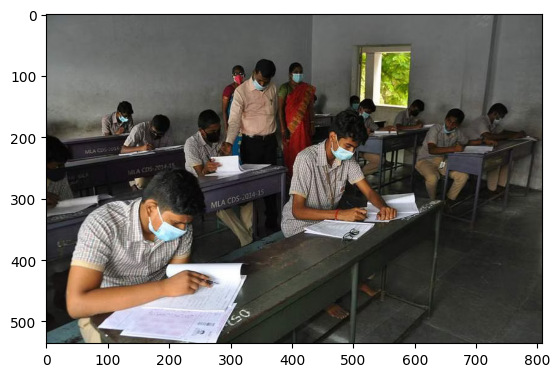

4097
2670
Ratio 1.5344569288389514
Predicted Count :  189


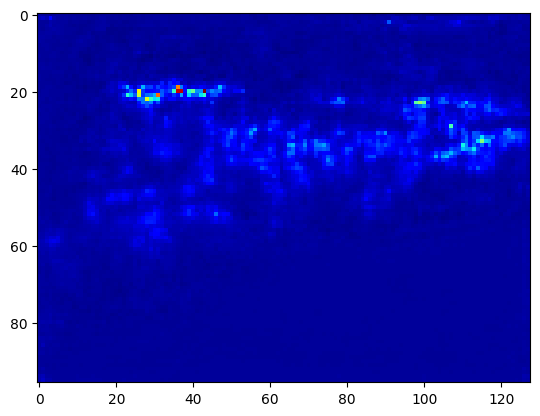

Original Image


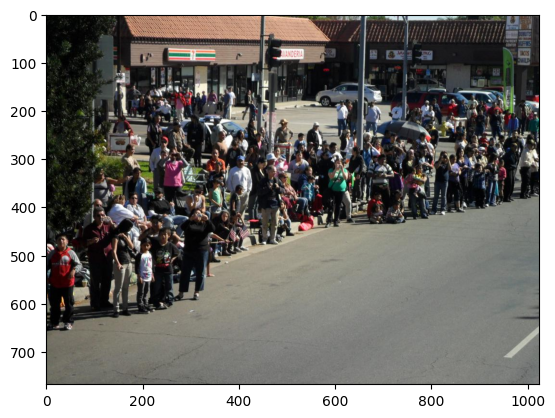

9705
2583
Ratio 3.75725900116144
Predicted Count :  797


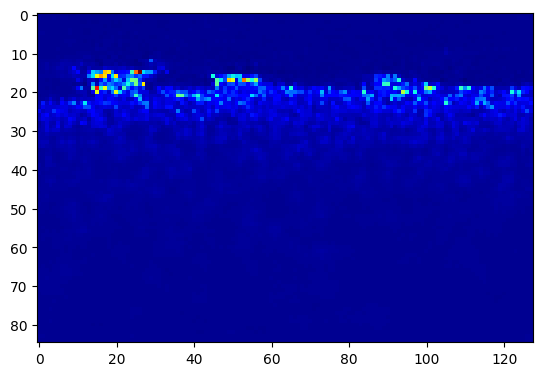

Original Image


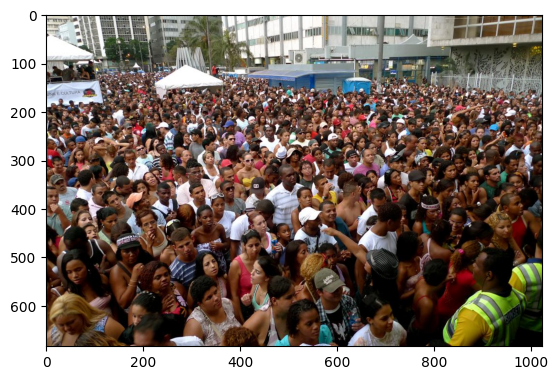

9133
1747
Ratio 5.227819118488838
Predicted Count :  1263


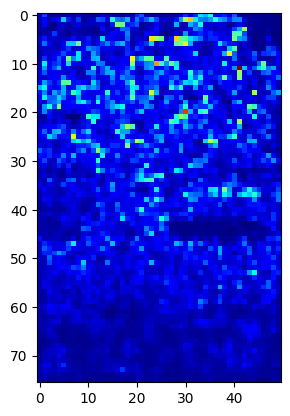

Original Image


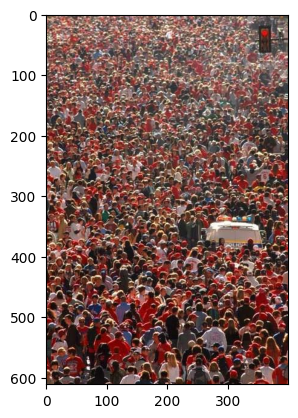

3794
6
Ratio 632.3333333333334
Predicted Count :  347


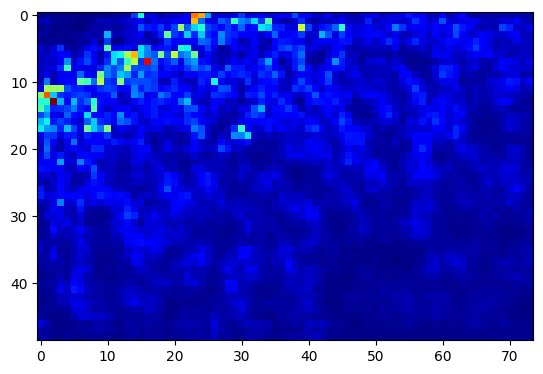

Original Image


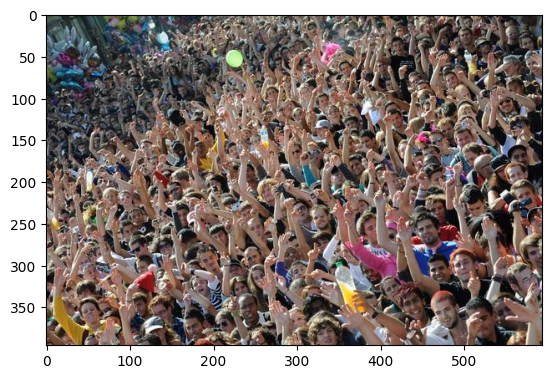

3624
2
Ratio 1812.0
Predicted Count :  1734


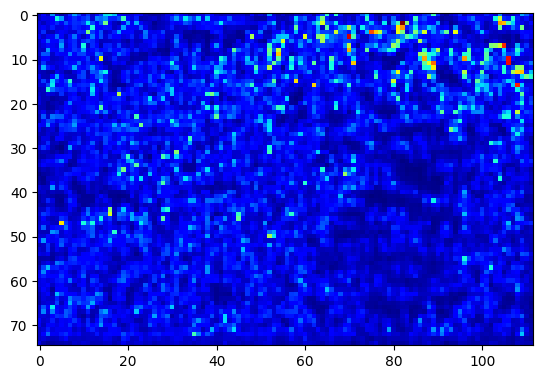

Original Image


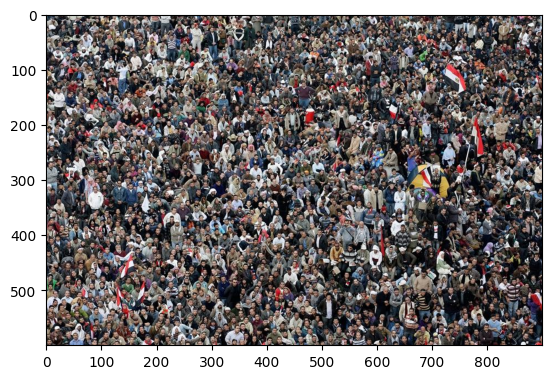

8399
1
Ratio 8399.0
Predicted Count :  289


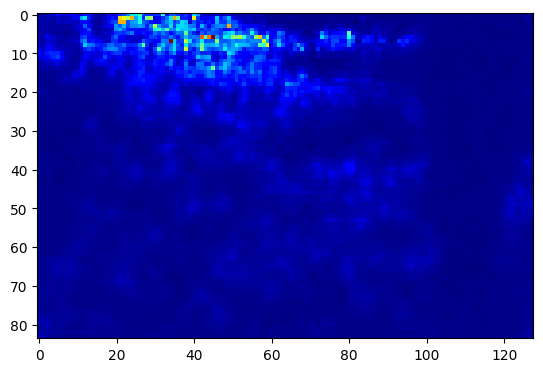

Original Image


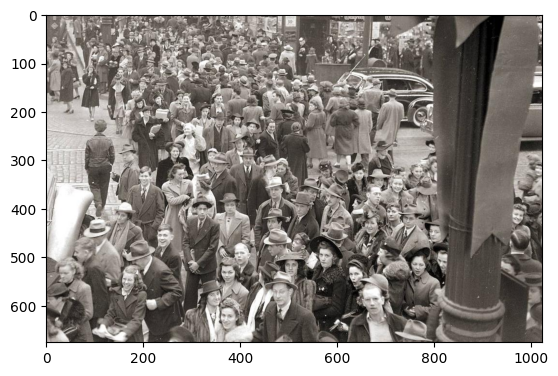

8841
1911
Ratio 4.626373626373627
Predicted Count :  276


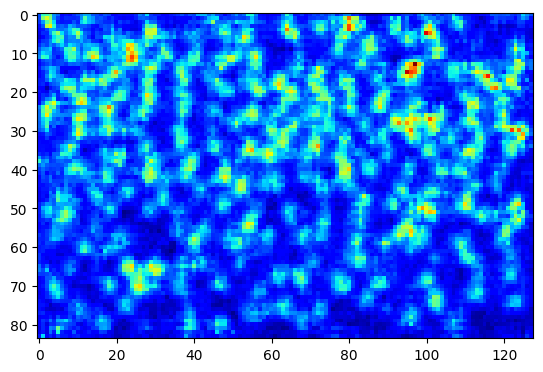

Original Image


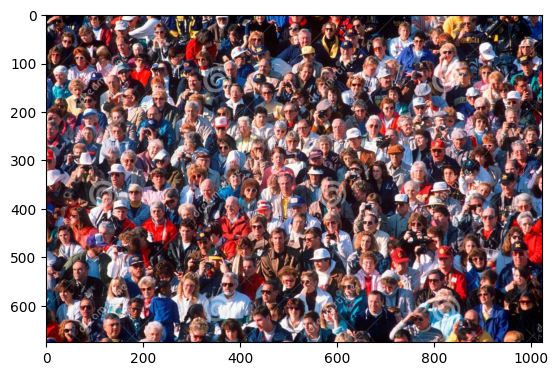

10591
161
Ratio 65.78260869565217


In [46]:
pickled_model = pickle.load(open('finalized_model.pkl', 'rb'))

# img = transform(Image.open('C://Users/dipta/Downloads/istockphoto-171156111-612x612.jpg').convert('RGB')).cuda()

images_list = ['C://Users/dipta/Downloads/istockphoto-171156111-612x612.jpg', 'C://Users/dipta/Downloads/nk_5_exam_0502chn_122_8.jpg',
'C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_114.jpg', 
'C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_110.jpg', 
'C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_115.jpg',
'C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_116.jpg',
'C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_117.jpg',
'C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_118.jpg',
'C://Users/dipta/Documents/PythonTasks/Crowd Detection/CSRNet-pytorch-master/ShanghaiTech\part_A/test_data\images\IMG_119.jpg']

for img_name in images_list:
    img = transform(Image.open(img_name).convert('RGB')).cuda()
    output = pickled_model(img.unsqueeze(0))
    print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
    temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
    plt.imshow(temp,cmap = c.jet)
    plt.show()
    print("Original Image")
    plt.imshow(plt.imread(img_name))
    plt.show()
    ps, ns = [], []
    for i in range(len(temp)):
        for j in range(len(temp[i])):
            if temp[i][j] > 0:
                ps.append(temp[i][j])
            else:
                ns.append(temp[i][j])
    print(len(ps))
    print(len(ns))
    print(f"Ratio {len(ps)/len(ns)}")